# Exercício 4

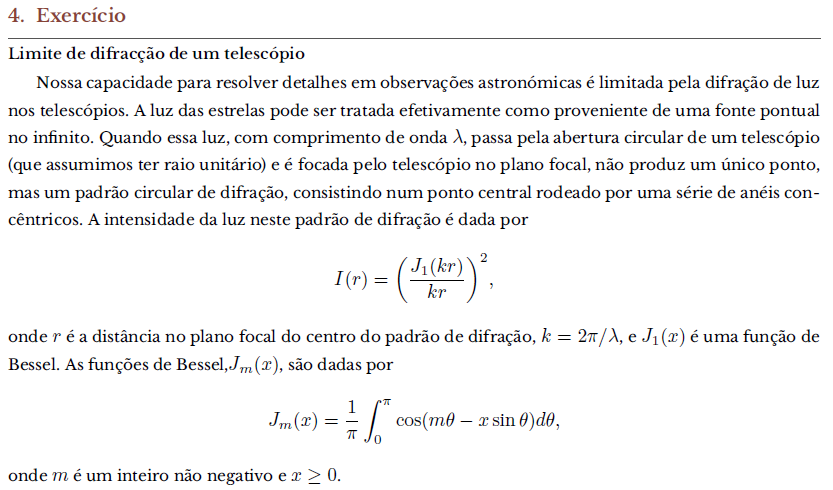
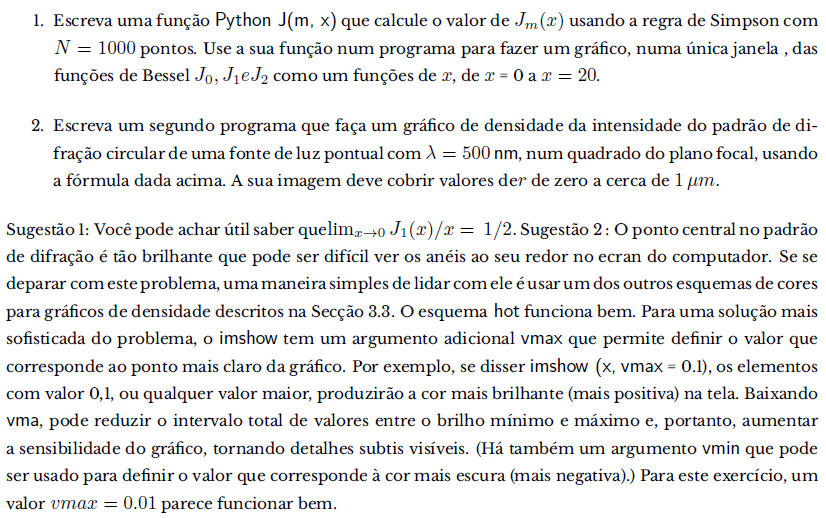

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

## Alínea 1

In [15]:
# Regra de Simpson total para 2n passos
def simpson_total(start: float, end: float, func: Callable, n: float) -> float:
    # Abcissas
    h = (end - start) / (2 * n)
    tt = np.linspace(start, end, 2 * n + 1)
    vv = func(tt)

    # Pesos
    wn = np.ones(2 * n + 1)
    wn[0] = 1/3
    wn[-1] = 1/3
    wn[1:2 * n:2]= 4/3
    wn[2:2 * n:2] = 2/3

    return h * (vv * wn).sum()


# Valos da função 
def J(m, x, pontos=500):
    def integrando(theta):
        return np.cos(m * theta - x * np.sin(theta))

    return simpson_total(0, np.pi, integrando, pontos) / np.pi


# Parâmetros
P = 2 # Nùmero de pontos
N = 500 # Número de intervalos na regra de Simpson


# Condições do Exercício
start = 0
end = 20


# Criar funções
xx = np.linspace(start, end, P)

J0 = np.array([J(0, xi) for xi in xx])
J1 = np.array([J(1, xi) for xi in xx])
J2 = np.array([J(2, xi) for xi in xx])

print(xx)
print(J0)
print(J1)
print(J2)



[ 0. 20.]
[1.         0.16702466]
[0.         0.06683312]
[ 0.         -0.16034135]


Parece que está certo!

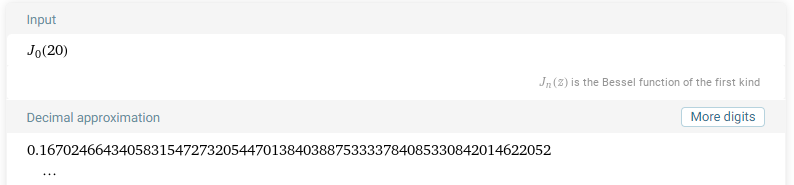
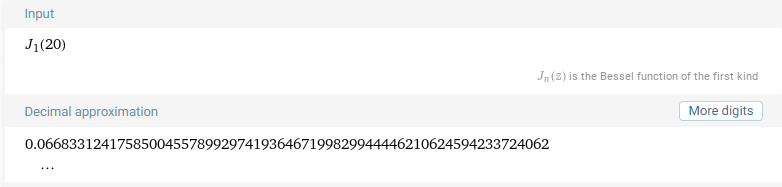
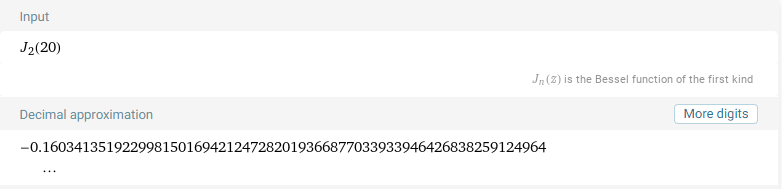

# Alínea 2

In [21]:
# Valores da Onda
comp = 500e-09
k = (2 * np.pi) / comp


def I(r, eps=1e-15):
    global k
    kr = k * r

    # Limite x -> 1/2
    if kr < eps:
        return 1/2

    return (J(1, kr) / kr)**2


# Parâmetros da Imagem
rmax = 1e-06
rmin = 1e-15
rn = 1000

# Determinar intensidade em diferentes valores do raio
rr = np.linspace(0, rmax, rn)
theta = np.linspace(0, 2 * np.pi, rn)

ii = np.array([I(r) for r in rr])

